# Module 4: Calculus & Differential Equations

---

## Motivation
Rarely are systems in the world static; everything we experience exist and change with respect to time. Some things change slowly, like a rock that appears the same after many years, and others change quickly, like the membrane potential of a neuron that fires an action potential. Whether slow or fast, understanding how these *dynamical systems* change over time is relevant to many areas of research. Geologists, knowing the abundance and half-life of specific radioisotopes in rocks, can estimate how old the rock. Similarly, Neuroscientists can model the membrane potential of a neuron by knowing the properties of specific ion channels and learn what perturbations to the system might cause it to fire an action potential. Both of these problems can be done using concepts of *differential equations*, a subject that relies heavily on principles learned in *calculus*.

If you've signed up for NEU 314 or have any interest in modeling dynamical systems in neuroscience, you'll be expected to know a thing or two about calculus and differential equations. While NEU 314 should have a review on calculus and teach you more about differential equations, the content provided over the next two days should introduce you to some of the basics of both and hopefully lay some groundwork that will help you in your later studies. If you're already familiar with calculus and differential equations, this module should serve as a brief review of some important things to remember. If you have no experience with either, I hope that the content is accessible enough to give you an intuitiuon for these concepts and make them more accessible the next time you encounter them.

The material written up here has drawn from textbooks I used as an undergraduate when taking these courses:
- Hughes-Hallett, Deborah, Andrew M. Gleason, and William G. McCallum. 2008. *Calculus: Single Variable*, 5th Edition. Wiley 
- Abell, Martha L. L., and James P. Braselton. 2009. *Introductory Differential Equations: With Boundary Value Problems*, 3rd Edition. Academic Press.

While I can't argue these are the *best* textbooks for either subject, they will certaintly provide a more thorought treatment of the subjects if you care to learn more. I also included the edition of the books I own; there are, of course, newer editions in print, but the older editions should be sufficient for a general overview.


---
# Day 2: Differential equations
Just like the section for calculus, this section of differential equations will be grossly oversimplified. In fact, I'm of the opinion that we'll be throwing out even more of the content you might learn in a formal differential equations class than you would a formal calculus class. This is because we'll be focusing mainly on methods of numerically solving ordinary differential equations and not all the additional tricks beyond simple antidifferentiation to get analytical solutions.


In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy.linalg as lin
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

---

## 1. Introduction to differential equations
According to Abell & Braselton in *Introductory Differential Equations with Boundary Value Problems, 3rd ed.*, a **differential equation** is one that "contains the derivative or differentials of one or more dependent variables with respect to one or more dependent variables". In simpler terms, it is an equation that relates some function to its derivative. We've already been exposed to differential equations in the calculus section. Recall our example function $y = t^2$; the analytical derivative of this function, $\frac{dy}{dt} = 2t$, is considered a differential equation. 

Differential equations in neuroscience, as well as in other fields, are used to model how systems change over time or with respect to other parameters. One of the most well-known sets of differential equations in neuroscience is the *Hodgkin-Huxley model*, which describes the membrane potential dynamics of the squid giant axon. The solution of this model is used to demonstrate the initiation and propagation of action potentials under various initial conditions. Differential equations can also by used to model behavioral phenomena; a notable example is a model of evidence accumulation, known as the *drift-diffusion model*, whose solution describes how behavioral evidence is accumulated over time to lead to a left-wards or right-wards choice. This model has been used in various labs in the department (see Carlos Brody's, Ilana Witten's, and David Tank's labs as an example) to describe behavior in working memory tasks such as the Poisson Clicks task and the Towers VR task. 

In the remainer of this section, we're going to cover a few of the most basic elements of differential equations using simple models and equations. In the next section we'll apply some of these tools to a simplified version of the Hodgkin-Huxley model to get an idea of how they can be used in practice.

### Some vocabulary
The differential equations addressed in this notebook are all what is referred to as ***first-order ordinary differential equations***. *First-order* means that the highest order differential in the equation is of the first order, i.e. a first-order derivative. *Ordinary differential equation* refers to a differential equation that depends on only *one* independent variable. This is the simplest type of differential equation you will encounter, and it sufficient to introduce some of the basic concepts of differential equations. In the remainder of this section, you can assume that any time I use the term *differential equation*, I'm referring to *first-order ordinary differential equations*.

### Separation of variables
First, I want to introduce the simplest method for analytically solving differential equations, which connects back to things we learned in the calculus section. Let's return to the differential equation we encountered in the calculus section: $\frac{dy}{dt} = 2t$. This represents one of the simplest types of differential equations where the left-hand side only depends on the independent variable, $t$. Oftentimes, however, differential equations can also be defined in terms of their dependent variables. You may be familiar with a common differential equation, that of exponential decay, $\frac{dy}{dt} = -ky$, where $k$ is some constant. This time the right-hand function only contains the dependent variable $y$. You may even come across differential equations that are defined in terms of both their dependend and independent variables, e.g. $\frac{dy}{dt} = \frac{t}{y}$.

Finding a function $y$ that satisfies a differential equation is considered a *solution* to that differential equation. For $\frac{dy}{dt} = 2t$, it might seem obvious that $y = t^2$ is a solution to this differential equation, since this is what was differentiated to compute it. This can be easily verified by plugging in $t^2$ for $y$ in the differential equation:

$$
\begin{aligned}
\frac{dy}{dt} &= 2t \\ 
\frac{d}{dt}t^2 &= 2t \\
2t &= 2t 
\end{aligned}
$$

But what if we didn't first differentiate $y$? And how would we find a solution to a differential equation that is also a function of $y$? Luckily, all three examples of differential equations above can be solved in the same way: through simple antidifferentiation via *separation of variables*. Let's start with $\frac{dy}{dt} = 2t$. In order to get a solution for this differential equation, we need to integrate (context: *indefinite* integration) both sides of the equation:

$$\int \frac{dy}{dt} = \int 2t$$

However, there's something wrong with the form of the above expression: the right side doesn't have a differential, and the left side has a differential in the denominator, neither of which are conducive to integration. This is where part one of the *separation* of variables occurs: we can treat $\frac{dy}{dt}$ as a fraction and multiply both sides by $dt$ to get

$$\int dy = \int 2t dt$$

Now, both sides of the equation can be integrated to get

$$ y = t^2 + C $$

Note that the constant $C$ is added through the process of indefinite integration, such that this is the *general* solution to the differential equation $\frac{dy}{dt} = 2t$.
> **Note:** Theoretically, integrating the left-hand side should also include a constant; however, it can be assumed that it is absorbed by the constant on the right-hand side.

How can we apply this to our second example,  $\frac{dy}{dt} = -ky$? Let's start by setting up our integrals and getting the differentials on their appropriate sides:

$$\int dy = \int -kydt$$

You may notice a new issue with the above expression: you can't integrate the right-hand side with respect to $t$ because our function, $-ky$, has no $t$s to be found. We also can't treat $y$ as a constant because we know that it depends on $t$ -- that's how we got this differential equation in the first place. Now comes part two of the separation of variables: all we have to do is move $y$ to the side that has the differential $dy$.

$$\int \frac{1}{y}dy = \int -kdt$$

Now the above expression is solvable. Using our table of integrals, we get

$$\ln y = -kt + C$$

We're not quite done yet; we need $y$ by itself for this to comprise the solution. Using inverse operations, we get the following:

$$y = A\exp^{-kt}$$

>**Note:** You may be wondering why I wrote the solution in this form and not $y = \exp^{-kt + C}$. Using properties of exponentials, we know that $\exp^{-kt+C} = \exp^{-kt}\exp^C$. Since $\exp^C$ is also a constant, I simply replaced $\exp^C$ with a new constant $A$ because it signifies the same thing, that it is an arbitrary constant, and provides a "cleaner" solution.

Now it should be clear why the original differential equation is referred as one of *exponential decay*. Plugging this solution into the differential equation should verify that it is indeed a solution.

The principles demonstrated above can be applied to our final example, $\frac{dy}{dt} = \frac{t}{y}$, to obtain a solution. We'll use separation of variables to get the differentials on there appropriate side, while making sure that all $y$s go to the left side and all $t$s stay on the right side.

$$ 
\begin{align}
\int y dy &= \int t dt \\
\frac{y^2}{2} &= \frac{t^2}{2} + C \\
y &= t+C
\end{align}
$$

All of the solutions above are *general* solutions to the differential equations. To get a specific solution, you'll need to be given some initial condition, e.g. $y(0) = 0$, which you can use to solve for the value of $C$. This is referred to as an **initial value problem** or IVP.

In summary, Separation of variables works for any differential equation that can be written in the form:

$$\boxed{ g(y)dy = f(t)dt }$$

How do we find analytical solutions for differential equations that *can't* be written in this form? In the context of this workshop: you don't. We can numerically approximate everything else, which we will learn how to do later on.

### Slope fields
Let's move onto something more tangible: slope fields. Slope fields are a way to visualize differential equations as well as solutions to them. They're useful in situations where the differential equation cannot easily be solved, yet insights into the behavior of its solutions are desired. Let's return to our familiar example $\frac{dy}{dt} = 2t$. $\frac{dy}{dt}$ can be thought of as a *slope* that can be computed for every $(t,y)$ pair.

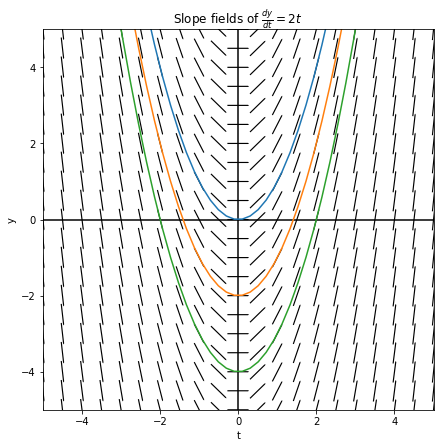

In [2]:
# populate points to compute slopes
t = np.linspace(-5,5,21)
y = np.linspace(-5,5,21)

# the differential equation
def diff(t,y):
    return 2*t

_, ax13 = plt.subplots(figsize=(7,7))

# code for ploting the slope field
for j in t:
    for k in y:
        slope = diff(j,k)
        # we're using matplotlib's quiver plot
        # with angles='xy', the inputs dictate that the slope should be drawn as the hypotenuse of the triangle
        # with base j to j+1 and height k to k+slope
        # pivot='mid' states that we want the slope centered at (j,k)
        # the width, headwitch, and headlength parameters all dictate arrow properties
        # with headwidth = 1, the arrow head is the same width as its stem, essentially removing the arrow
        ax13.quiver(j,k,1,slope,angles='xy',width=0.003,headwidth=1,headlength=1,pivot='mid')

    
# some extra visualizations        
t2 = np.linspace(-5,5,50)
ax13.axhline(y=0, color='k')
ax13.axvline(x=0, color='k');
ax13.plot(t2,t2**2)
ax13.plot(t2,t2**2-2);
ax13.plot(t2,t2**2-4);
ax13.axis([-5,5,-5,5]);
ax13.set_title(r"Slope fields of $\frac{dy}{dt}=2t$");
ax13.set_xlabel("t")
ax13.set_ylabel("y");

Plotted above is the slope field of $\frac{dy}{dt} = 2t$. Each line plotted represents the slope of the tangent line to solutions of $\frac{dy}{dt}$ at each point. For non-zero slopes, you can imagine that the line being plotted is the hypotenuse of the triangle with base length $1$ and height $\frac{dy}{dt}$ centered at the point where $\frac{dy}{dt}$ is computed, which are then all normalized to be of equal length. Overlaid are a few solutions to this differential equation: $y = t^2$, $y = t^2-2$, and $y=t^2-4$. It's easy to see how these solutions follow the slope lines; additionally, it would be easy to qualitatively draw out additional solutions using the slope lines.

Slope fields are also a way to visualize an important concept in differential equations: the *existance* and *uniqueness* of solutions. Since differential equations apply to many real-world problems, it's important to know whether solutions exist and whether they are unique to be able to make future predictions about that system. Imagine a population whose dynamics are described by exponential growth, or $\frac{dy}{dt} = 0.5y$. If you know that $y(0) = 200$, is it possible to predict what the population is at $t = 5$? We can quickly answer this question by looking at the slope field.

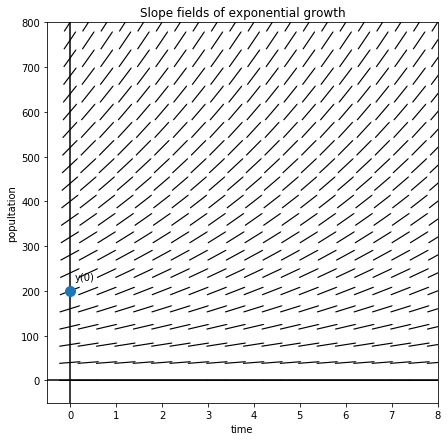

In [3]:
# populate points to compute slopes
t = np.linspace(0,8,21)
y = np.linspace(0,800,21)

def diff(t,y):
    return 0.2*y

_, ax14 = plt.subplots(figsize=(7,7))

for j in t:
    for k in y:
        slope = diff(j,k)
        ax14.quiver(j,k,1,slope,angles='xy',width=0.003,headwidth=1,headlength=1,pivot='mid')
        
t2 = np.linspace(-5,5,50)
ax14.axhline(y=0, color='k')
ax14.axvline(x=0, color='k');
ax14.plot(0,200,'.',ms=20)
ax14.text(0.1,225,'y(0)')
ax14.axis([-0.5,8,-50,800]);
ax14.set_title(r"Slope fields of exponential growth");
ax14.set_xlabel("time")
ax14.set_ylabel("popultation");

First, does a solution *exist*? By looking at the initial point, we can see that, yes, there is a slope defined at that point, and we can draw a continous line extending out from it. Second, is the solution *unique*? Also yes: there is only one slope defined at the initial point, and it points in a single direction, meaning there is only one trajectory it can follow. With these conditions satisfied, we can be confident that we can make real, unique predictions about the system. We can even use the slope field to easily estimate what the population might be at $t = 5$ by tracing out the arrows (hint: the answer is 544, were you able to get close?)

### Systems of differential equations and direction fields

Many dynamical system models come in the form of *systems* of differential equations, including the Hodgkin-Huxley model. In its simplest form, this means that we have differentials for at least two dependent variables that change with respect to a single independent variable. While we won't get into how to analytically solve systems of differential equations, it might be useful to demonstrate how to visualize them. Let's start with a simple system:

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= y \\
\frac{dy}{dt} &= -x
\end{aligned}
\right.
$$

If we were to plot slope fields of the above equation as we did in the previous section, we would have to plot $\frac{dx}{dt}$ and $\frac{dy}{dt}$ separately. This would be useful for visualzing each differential equation separately, but would give us no intuition on how the *system* moves together. To gain insight into the system using slope fields, we would need to transorm the above system into a single equation such that we can plot the two dependent variables together. This can be done by rewriting the system as $\frac{dy}{dx}$, which can be done by dividing the two equations $\frac{dy/dt}{dx/dt}$. Canceling out $dt$, we get

$$
\frac{dy}{dx} = \frac{-x}{y}
$$

which is plotted below on the left.

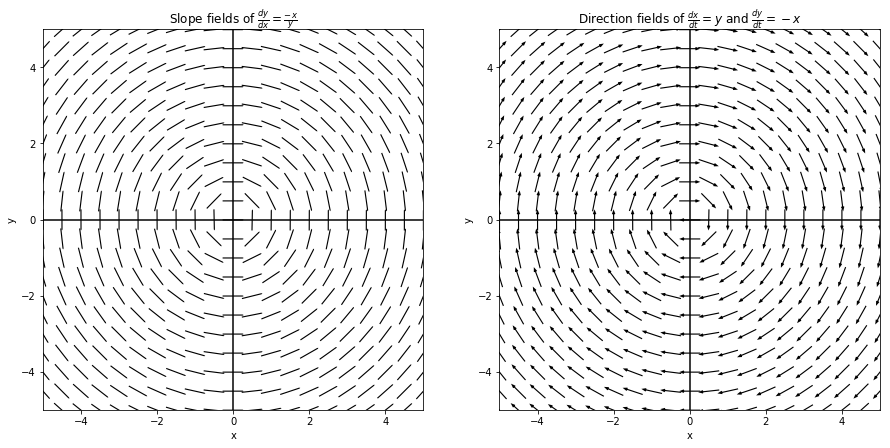

In [4]:
# populate points to compute slopes
x = np.linspace(-5,5,21)
y = np.linspace(-5.01,4.99,21)

def diff(x,y):
    return -x/y

_, (ax15,ax16) = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

for j in x:
    for k in y:
        slope = diff(j,k)
        ax15.quiver(j,k,1,slope,angles='xy',width=0.003,headwidth=1,headlength=1,pivot='mid')
        # for the direction field, we have a headwidth>1 such that we can see the arrow
        ax16.quiver(j,k,k,-j,angles='xy',width=0.003,headwidth=3,headlength=4,pivot='mid')
    
t2 = np.linspace(-5,5,50)
ax15.axhline(y=0, color='k')
ax15.axvline(x=0, color='k');
ax15.axis([-5,5,-5,5]);
ax15.set_title(r"Slope fields of $\frac{dy}{dx}=\frac{-x}{y}$");
ax15.set_xlabel("x")
ax15.set_ylabel("y");

ax16.axhline(y=0, color='k')
ax16.axvline(x=0, color='k');
ax16.axis([-5,5,-5,5]);
ax16.set_title(r"Direction fields of $\frac{dx}{dt}= y$ and $\frac{dy}{dt}=-x$");
ax16.set_xlabel("x")
ax16.set_ylabel("y");

The slope field gives a good intuition on how $x$ and $y$ vary with each other, but we lose all information about the independent variable $t$. To retain information about $t$, we can use a similar visualization known as a *direction field*. To plot a direction field, you can treat the system of differential equations as if it were a parametric equation, $<dx/dt,dy/dy> = dx/dt \textbf{i} + dy/dt \textbf{j}$, which gives us the rate of change in both the $x$ and $y$ directions for every step of $t$. This gives us a tangent *vector* to plot at each point instead of the scalar tangent slope given by a single differential equation, shown in the graph above on the right. Similarly, this graph is constructed by plotting the hypotenuse of a triangle, now with base width $dx/dt$ and height $dy/dt$ pointing in the direction of $<dx/dt,dy/dy>$, also normalized to be the same length. Both the slope and direction fields will give the same shape of the solutions to the system of differential equations, as seen above, but the direction field gives the added information on how these solutions evolve over time.


### Numerical solutions

In many situation when analytically solving differential equations is unfeasible, we'll rely on numerical methods to approximate solutions. Even in situations where you *could* analytically solve the differential equation, sometimes it's just easier and faster to use numerical solutions. There are two numerical methods that we'll be covering in this section: *Euler's method* and the *Improved Euler's method*. Both methods are similar, with the latter building upon the former (as can be assumed by its name). Importantly, they are both *iterative* methods, meaning that the approximate value at one step is dependent on the approximate value computed from the previous step. In the realm of programming, this means we'll need to utilyze *for loops* to compute them.

A third notable method is the *Runge-Kutta method*. Since its derivation is a bit more complicated and depends on some calculus not covered above, we won't be covering this method in the workshop. However, if you find yourself itching for some more numerical methods that improve acurracy, I'd encourage you to look into it.

<ins> **Euler's Method** </ins>

The first method we'll cover, *Euler's method*, is the easiest of the three while also being the least accurate. Despite the latter concern, Euler's method is sufficient to use as an approximation in most of the situations you'll encounter in this program; so if there's *one* method to remember, let it be this one.

Euler's method revolves around the fact that a differential equation will give you a slope that is tangent to the solution at any point. Using this slope, you can linearly approximate the distance between some *given* initial point and a later point by using the familiar equation $y = mx + b$. Let's rewrite this age-old equation in terms that are more relevant to some general differential equation, $\frac{dy}{dx} = f(x,y)$ and initial value $y(x_0) = y_0$.

$$
y_1 = f(x_0,y_0)(x_1-x_0) + y_0 = hf(x_0,x_0) + y_0
$$

As you can see, we replaced the slope $m$ with the value of the differential equation at the initial point, $f(t_0,y_0)$, and the y-intercept $b$ was replaced with the initial value of $y=y_0$. The independent variable $x$ was replaced with the distance we want to travel in the x-direction $(x_1-x_0)$ to get the value of $y$ at our final destination $y_1$; this quantity can be replaced by the variable $h$ because we'll want to move a fixed x-distance at each step. After computing $y_1$, we can compute $y_2$ in a similar fashion by replacing $y_0$ and $x_0$ with $y_1$ and $x_1$.

$$
y_2 = hf(x_1,y_1) + y_1
$$

And thus begins our iterative process that can repeat indefinitely until some final point is reached. Euler's method can be summarized by the following iterative equation:

<div class="alert alert-block alert-info">
    <b>Euler's Method:</b> The solution of the IVP 
$$ \frac{dy}{dx} = f(x,y), y(x_0) = y_0 $$
is approximated at the sequences of points $(x_n,y_n)$, $n=1,2,...,N$, wjere $y_n$ is the approximate value of $y(x_n)$ by computing
$$ y_n = hf(x_{n-1},y_{n-1}) + y_{n-1} $$
where $h = \frac{x_N - x_0}{N}$ is the selected stepsize
</div>

Let's visualize this process using our iconic differential equation $\frac{dy}{dt} = 2t$, initial value $y(0) = 2$, and stepsize $h = 0.5$, plotted below in blue.

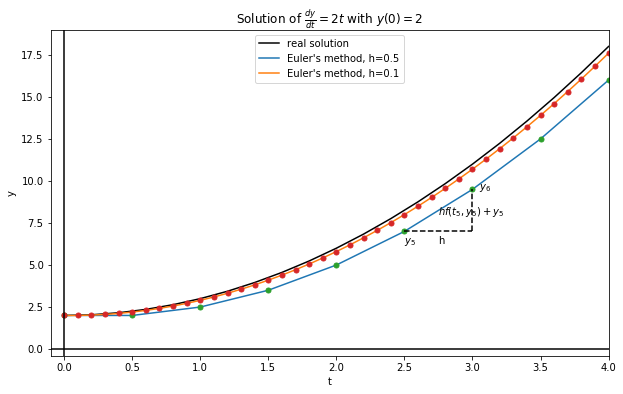

In [5]:
# plot equation f = t^2
t = np.linspace(0,4,21) # populate t
y = t**2 + 2            # populate f(t)

def diff(t,y):
    return 2*t

# plot and add some visualizations
_, ax17 = plt.subplots(figsize=(10,6))
ax17.plot(t,y,'k')
ax17.set_title(r"Solution of $\frac{dy}{dt} = 2t$ with $y(0)=2$")
ax17.set_xlabel('t')
ax17.set_ylabel('y');
ax17.axis([-0.1,4,-0.4,19]);

# Euler's method
h = 0.5                        # our stepsize
t_em = np.arange(0,4.1,h)      # timestamps
N = np.size(t_em)              # number of steps
y_em = np.zeros_like(t_em)     # initialize solution array
y_em[0] = 2                    # initial value
# iterative loop
for n in np.arange(1,N):
    t_em[n-1]
    y_em[n] = h*diff(t_em[n-1],y_em[n-1]) + y_em[n-1]
    
# Euler's method with smaller stepsize
h = 0.1
t_em2 = np.arange(0,4.1,h)
N = np.size(t_em2)
y_em2 = np.zeros_like(t_em2)
y_em2[0] = 2
for n in np.arange(1,N):
    t_em2[n-1]
    y_em2[n] = h*diff(t_em2[n-1],y_em2[n-1]) + y_em2[n-1]

# plot the things
ax17.plot(t_em,y_em)
ax17.plot(t_em2,y_em2)
ax17.plot(t_em,y_em,'.',ms=10);
ax17.plot(t_em2,y_em2,'.',ms=10);
ax17.axhline(y=0, color='k')
ax17.axvline(x=0, color='k');
ax17.plot([2.5,3],[y_em[5],y_em[5]],'--k')
ax17.plot([3,3],[y_em[5],y_em[6]],'--k')
ax17.text(2.75,6.25,'h')
ax17.text(3.05,9.5,r'$y_6$')
ax17.text(2.5,6.25,r'$y_5$')
ax17.text(2.75,8,r'$hf(t_5,y_5)+y_5$')
ax17.legend(("real solution","Euler\'s method, h=0.5","Euler\'s method, h=0.1"));

You can see that our approximation using Euler's method gets pretty close to the real solution, $y=t^2+2$, plotted in black. The green dots represent the points at which we're approximating the solution, one for each iteration of the for loop (excluding the initial point, $(0,2)$). Overlaid are labels to visualize what Euler's method is computing, looking specifically between $y_5$ and $y_6$. The horizontal dashed like is the change in $t$, denoted by $h$, which is the same between every green point. The blue line connecting $y_5$ and $y_6$ is the line computed by Euler's method at step 5, telling us how far from $y_5$ we need to go to get the approximate $y_6$.

Just like our numerical approximations of derivatives and integrals, we can improve our approximation by decreasing the stepsize $h$ (or increasing the number of steps $n$). Plotted in orange is an approximation using $h=0.1$; already it's gotten much closer to the real solution than our original approximation was.

<ins> **Improved Euler's Method** </ins>

Euler's method can be improved by using the average slope between $(x_{n-1},y_{n-1})$ and $(x_n,y_n)$ instead of using solely the slope at $(x_{n_1},y_{n-1})$. This requires computing an intermediate via the original Euler's method $y_n^*$ to calculate the average slope between these points, which is then used to calculate the final $y_n$. The improved Euler's method can be summarize as follows:
<div class="alert alert-block alert-info">
<b>Improved Euler's Method:</b> The solution of the IVP
$$ \frac{dy}{dx} = f(x,y), y(x_0)=y_0$$
is approximated at the sequence of points $(x_n,y_n)$, $n=1,2,...,N$, where $y_n$ is the approximte value of $y(x_n)$ by computing at each step the two calculations:
$$\begin{align}
y_n^* &= hf(x_{n-1},y_{n-1}) + y_{n-1} \\
y_n &= \frac{1}{2}h(f(x_{n-1},y_{n-1})+f(x_n,y_n^*)) + y_{n-1}
\end{align}$$
where $h=\frac{x_N-x_0}{N}$ is the selected stepsize.
</div>

Let's see how the improved Euler's method compares to the original using $\frac{dy}{dt} = 2t$, initial value $y(0) = 2$, and stepsize $h = 0.5$.

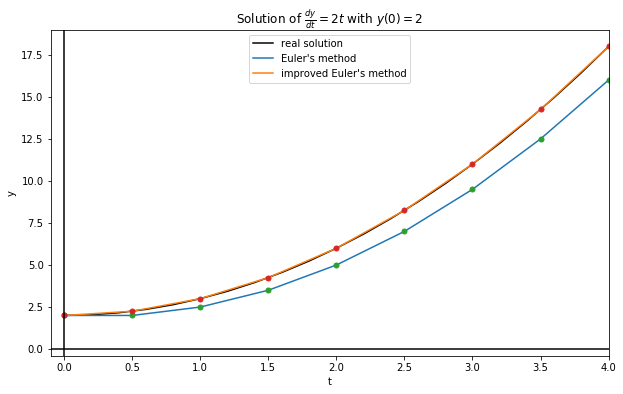

In [6]:
# compute y = 2t
t = np.linspace(0,4,21) # populate t
y = t**2 + 2            # populate f(t)

# the differential equation
def diff(t,y):
    return 2*t

# plot and add some visualizations
_, ax18 = plt.subplots(figsize=(10,6))
ax18.plot(t,y,'k')
ax18.set_title(r"Solution of $\frac{dy}{dt} = 2t$ with $y(0)=2$")
ax18.set_xlabel('t')
ax18.set_ylabel('y');
ax18.axis([-0.1,4,-0.4,19]);

# Euler's method
h = 0.5
t_em = np.arange(0,4.1,h)
N = np.size(t_em)
y_em = np.zeros_like(t_em)
y_em[0] = 2
for n in np.arange(1,N):
    y_em[n] = h*diff(t_em[n-1],y_em[n-1]) + y_em[n-1]
    
# improved Euler's method
t_em2 = np.arange(0,4.1,h)
y_em2 = np.zeros_like(t_em2)
y_em2[0] = 2
for n in np.arange(1,N):
    ytmp = h*diff(t_em2[n-1],y_em2[n-1]) + y_em2[n-1] # our temporary slope
    y_em2[n] = h/2*(diff(t_em2[n-1],y_em2[n-1])+diff(t_em2[n],ytmp)) + y_em2[n-1]

# plot the things
ax18.plot(t_em,y_em)
ax18.plot(t_em2,y_em2)
ax18.plot(t_em,y_em,'.',ms=10);
ax18.plot(t_em2,y_em2,'.',ms=10);
ax18.axhline(y=0, color='k')
ax18.axvline(x=0, color='k');
ax18.legend(("real solution","Euler\'s method","improved Euler\'s method"));

It's clear that the improved Euler's method (plotted in orange) does a much better job at approximating the solution than the original Euler's method (plotted in blue), even at a somewhat large stepsize of $h=0.5$.

If you're curious about the Runge-Kutta method, what it essentially does is take a weighted average of the slopes computed at any number of of points in the interval with greater weights towards slopes in the middle. It is derived using some fancy math known as a *Taylor expansion*. The most common numer of slopes used is four, which is referred to as the *Runge-Kutta Method of Order 4*. 

### Analytical solutions versus numerical approximations
Throughout today's and yesterday's lectures, we've covered both analytical solutions and numerical approximations to applications of calculus and differential equations. However, one question we have yet to discuss is: *when* is it appropriate to use one method over the other? To answer this question, let's go over some of the pros and cons of each method.

**Analytical solutions** will always be the most *accurate* solution you can have to a mathematical problem; however, they can be difficult to find, sometimes costly to implement, and may not exist in all situations. **Numerical approximations**, on the other hand, are much easier to compute and can be applied to *almost* all situations, but suffer from decreased accuracy from increased sources of error. Based on this information, the choice between using analytical solutions versus numerical approximations comes down to a tradeoff between computation *accuracy* versus *efficiency*. In cases where analytical solutions do not exist, it's an easy choice to stick to numerical approximations. However, when analytical solutions are available, the confidence gained by optimal accuracy is often reason enough to use them. What this boils down to is: in many if not most cases, numerical approximation is sufficient and steps can be taken to combat the decreased accuracy; however, if an analytical solution exists and is easy enough to find and use, it should be used for the increased confidence and accuracy.

---

## 2. Membrane potential dynamics

Let's apply the principles we learned above to a common differential equation in neuroscience. The differential equation below describes the membrane potential dynamics of a neuron whose membrane is only permeable to a single ion.

$$
C \frac{dV}{dt} = (E_\text{ion} - V) \frac{1}{R} + I_\text{input}
$$

$I_{input}$ is an input current, $V$ is the membrane voltage, and $C$ is the membrane capacitance. $E_{ion}$ is a constant known as the *Nernst potential* of the ion channel, which describes the voltage at which no current flows. With only one ion channel, this is equivalent to the *resting membrane potential*. $R=\frac{1}{g_{ion}}$ where $g_{ion}$ is the conductance of the ion channel. For this neuron, we'll assume $E_{ion} = -70$ mV and $RC = 20$ ms. If your familiar with circuit diagrams, the above equation can be visualized as the following circuit (assuming $I_{input} = 0$)
<img src="circuit.png" width=300>
The membrane potential $V$ is the potential difference across the membrane, which is the difference between the potential *outside* vs. *inside* the neuron. The ion channel is represented as a *resistor* ($R$) in series with a single-cell *battery* ($E_{ion}$), such that when the resister is open (i.e. current/ions are allowed to flow through), it pushes the membrane potention towards the value of $E_{ion}$. The membrane capacitance is represented as a *capacitor* ($C$) resulting from the membrane composition as a *phospholipid bilayer*, which represents a thin insulator separating the conductive fluid outside and insice the cell. This capacitor stores charge as current flows through the membrance, where its capacitance determines how quickly the membrane potential can respond to a change in current. If none of this makes sense to you, don't worry! You'll cover these principles in much more detail in your core courses.

### Visualization

Let's start by plotting the slope field corresponding to the above differential equation to visualize solutions. We'll assume that the input current $I_\text{input} = 0$, but I encourage you to play around with this constant to see how it changes the solutions.

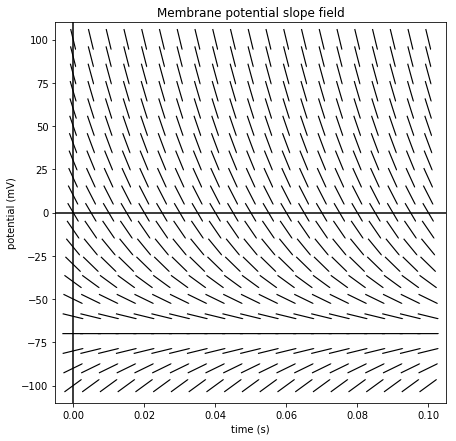

In [7]:
# initialize constants
RC = 0.02
E_ion = -70
Iin_C = 0

# membrane potential dynamics
def dV_dt(V):
    return (E_ion-V)/RC + Iin_C

# initialize points to compute slopes
t = np.linspace(0,0.1,21)
V = np.linspace(-100,100,21)

_, ax = plt.subplots(figsize=(7,7))

# slope field
for j in t:
    for k in V:
        slope = dV_dt(k)
        ax.quiver(j,k,1,slope,angles='xy',width=0.003,headwidth=1,headlength=1,pivot='mid')

# add other nice things      
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k');
ax.set_title("Membrane potential slope field");
ax.set_xlabel("time (s)")
ax.set_ylabel("potential (mV)");

You may notice something interesting about these solutions -- they all decay towards $V = -70 mV$, which is the defined Nernst potential of our ion channel. This reiterates the concept of the resting membrane potential: in the absence of outside influence, the membrane potential will return to its resting state. In fact, the rate at which it returns to this state is equal to $RC$, also know as the *RC time constant* in electronics. More generally, the RC time constant determines how long it takes for current to be converted to changes in voltage. This property will be further demonstrated below when we solve for the analytical solution.

### Analytical solution
While finding the analytical solution to this differential equation is possible and not *exceedingly* difficult, it's not something I'd expect anyone to easily do if these lectures are their only exposure to calculus and differential equations. Nonetheless, for the sake of demonstration, I'll go through the process anyway to give an idea of what it looks like.

Luckily, this is an example of a differential equation that can be analytically solved using separation of variables and antidifferentiation. Let's start the process by rearranging the equation to something we can work with.

$$
\int C \frac{dV}{dt} =  \int(E_\text{ion} - V) \frac{1}{R} + I_\text{input} \\
\int \frac{C}{(E_\text{ion} - V) \frac{1}{R} + I_\text{input}} dV =  \int dt \\
\int \frac{1}{\frac{E_\text{ion}}{RC} - \frac{V}{RC} + \frac{I_\text{input}}{C}} dV =  \int dt
$$

Now remember, everything except $V$ is a constant, so this integral is actually much simpler than it looks. To make it even more straight forward, we're going to use the following substitution:

$$
w = \frac{E_\text{ion}}{RC} - \frac{V}{RC} + \frac{I_\text{input}}{C} \\
\frac{dw}{dV} = -\frac{1}{RC}
$$

rearranging for $dV$, we get:

$$
dV = -RC dw
$$

Substituting these into our integral, we now have

$$
\int \frac{-RC}{w} dw =  \int dt
$$

This looks much nicer! In fact, using the table of integrals we know that $\int \frac{a}{x}dx = a \text{ ln}|x| + c$, where little $c$ is an arbitrary constant. Antidifferentiating and substituting out $w$, then, gives us

$$
-RC \text{ ln}|w| + c = t \\
-RC \text{ ln}|\frac{E_\text{ion}}{RC} - \frac{V}{RC} + \frac{I_\text{input}}{C}| = t + c
$$

Of course, we want this written as a function of $V$:

$$
-RC \text{ ln}|\frac{E_\text{ion}}{RC} - \frac{V}{RC} + \frac{I_\text{input}}{C}| + c = t \\
\text{ ln}|\frac{E_\text{ion}}{RC} - \frac{V}{RC} + \frac{I_\text{input}}{C}| = -\frac{t + c}{RC} \\
\frac{E_\text{ion}}{RC} - \frac{V}{RC} + \frac{I_\text{input}}{C} = e^{-\frac{t + c}{RC}} = Ae^{-\frac{t}{RC}} \\
V = E_\text{ion} + RI_\text{input} - RC \cdot Ae^{-\frac{t}{RC}}
$$

where $A$ is a constant that can be solved for given initial conditions. If we assume initial voltage $V(t=0) = V_0$, then solving for A we get:

$$
V(0) = E_\text{ion} + RI_\text{input} - RC \cdot Ae^{-\frac{0}{RC}} = V_0 \\
A = \frac{E_\text{ion}}{RC} + \frac{I_\text{input}}{C} - \frac{V_0}{RC}
$$

but we'll keep A in there for now to keep things clean. You may notice that this solutions follows the form of *exponential decay*, where we see the resurgence of our RC time constant as the decay rate. We can verify that this is indeed the general solution to our original differential equation by differentiating it back using the chain rule:

$$
\frac{dV}{dt} = -RC \cdot Ae^{-\frac{t}{RC}} \cdot -\frac{1}{RC} \\
\frac{dV}{dt} = Ae^{-\frac{t}{RC}}
$$

This doesn't look quite like our original differential equation. However, if we rearrange our solution and replace $Ae^{-\frac{t}{RC}}$ with $\frac{dV}{dt}$, we'll find that it can be recovered.

$$
V = E_\text{ion} + RI_\text{input} - RC \cdot Ae^{-\frac{t}{RC}} \\
C\cdot Ae^{-\frac{t}{RC}} = \frac{1}{R}(E_\text{ion} - V) + I_\text{input} \\
C \frac{dV}{dt} = \frac{1}{R}(E_\text{ion} - V) + I_\text{input}
$$

And there it is! We have successfully found and verified the general solution to our differential equation.

### Numerical approximation

Last, but definitely not least, we'll apply Euler's method and the improved Euler's method to numerically approximate a solution to this differential equation. To do this, of course, we'll need some initial conditions. Let's keep it simple a solve for the case where $V(0) = 0$. Since we also have the equation for the analytical solution, we can plot that alongside our numerical solutions to see how they compare.

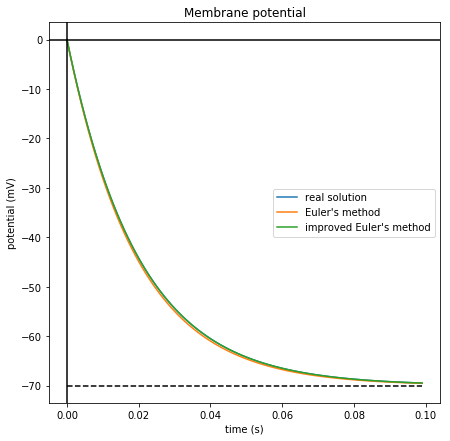

In [8]:
# initialize constants
RC = 0.02
E_ion = -70
Iin_C = 0
V_init = 0

# membrane potential dynamics
def dV_dt(V):
    return (E_ion-V)/RC + Iin_C

# Euler's method
h = 0.001
t = np.arange(0,0.1,h)
V_em = np.zeros_like(t)
N = np.size(t)
V_em[0] = V_init
for n in np.arange(1,N):
    V_em[n] = h*dV_dt(V_em[n-1]) + V_em[n-1]
    
# improved Euler's method
V_em2 = np.zeros_like(t)
V_em2[0] = V_init
for n in np.arange(1,N):
    Vtmp = h*dV_dt(V_em2[n-1]) + V_em2[n-1]
    V_em2[n] = h/2*(dV_dt(V_em2[n-1])+dV_dt(Vtmp)) + V_em2[n-1]

# equation for the real solution
A = E_ion/RC + Iin_C - V_init/RC
V_as = E_ion + RC*Iin_C - RC*A*np.exp(-t/RC)

# plotting
_, ax = plt.subplots(figsize=(7,7))
ax.plot(t,V_as)
ax.plot(t,V_em)
ax.plot(t,V_em2)
ax.plot(t,E_ion*np.ones_like(t),'k--')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k');
ax.legend(("real solution","Euler\'s method","improved Euler\'s method"));
ax.set_title("Membrane potential");
ax.set_xlabel("time (s)")
ax.set_ylabel("potential (mV)");

Unsurprisingly, we see the voltage decay towards the resting membrane potential at $-70$ mV, like we observed with the slope field. Both Euler's method and the improved Euler's method provide good approximations to the real solution.